In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
X_train, x_test, Y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [5]:
dir(digits)


['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
def cross_validation(estimator):
    _, train_scores, test_scores = learning_curve(estimator, X_train, Y_train, cv=10, n_jobs=-1, train_sizes=[1.0, ], scoring="accuracy")
    test_scores = test_scores[0]
    mean, std = test_scores.mean(), test_scores.std()
    return mean, std

def plot(title, xlabel, X, Y, error, ylabel = "Accuracy"):
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid()
    plt.ylabel(ylabel)
    
    plt.errorbar(X, Y, error, linestyle='None', marker='o')

### KNN 

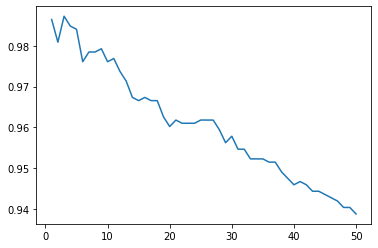

In [7]:
title = "Change K"
xlable = "K"
k_range = range(0, 51)
X = []
Y = []
error = []

for k in range(0, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    mean, std = cross_validation(knn)
    X.append(str(k))
    Y.append(mean)
    error.append(std)

plt.plot(k_range, Y)
# plot(title, xlable, X, Y, error)
# plt.show()
# sn.lineplot(x=k_range, y=Y)

### SVM

100%|██████████| 5/5 [00:00<00:00,  5.52it/s]


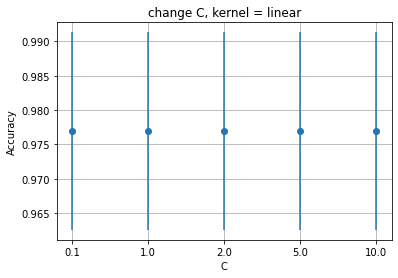

In [8]:
title = "change C, kernel = linear"
xlabel = "C"
X = []
Y = []
error = []

for C in tqdm([.1, 1.0, 2.0, 5.0, 10.0]):
    text_clf = svm.SVC(kernel='linear', C=C)
    mean, std = cross_validation(text_clf)
    X.append(str(C))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.show()

### Random Forest

In [1]:
title = "thay đổi n_estimators, criterion = gini"
xlabel = "n_estimators"
X = []
Y = []
error = []

for n_estimators in tqdm([10, 50, 100, 300]):
    text_clf = RandomForestClassifier(criterion='gini', n_estimators=n_estimators)
    mean, std = cross_validation(text_clf)
    X.append(str(n_estimators))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.show()

NameError: name 'RandomForestClassifier' is not defined

### Compare among models

In [11]:
_knn = KNeighborsClassifier(n_neighbors=4)
_svm = svm.SVC(kernel='linear', C=1.0)
_rf = RandomForestClassifier(criterion="gini", n_estimators=100)

_knn.fit(X_train, Y_train)
_svm.fit(X_train, Y_train)
_rf.fit(X_train, Y_train)


RandomForestClassifier()

In [13]:
print(f'KNN: {accuracy_score(y_test, _knn.predict(x_test))}')
print(f'SVM: {accuracy_score(y_test, _svm.predict(x_test))}')
print(f'RF: {accuracy_score(y_test, _rf.predict(x_test))}')

KNN: 0.9851851851851852
SVM: 0.9833333333333333
RF: 0.9796296296296296


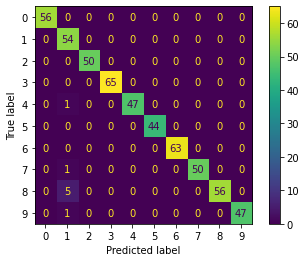

In [14]:
knn_predictions = _knn.predict(x_test)
cm1 = confusion_matrix(y_test, knn_predictions, labels=_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=_knn.classes_)
disp.plot()
plt.show()

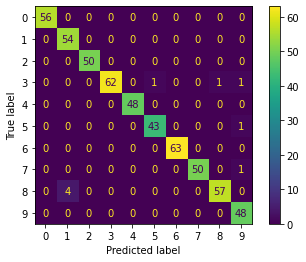

In [15]:
svm_predictions = _svm.predict(x_test)
cm1 = confusion_matrix(y_test, svm_predictions, labels=_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=_svm.classes_)
disp.plot()
plt.show()

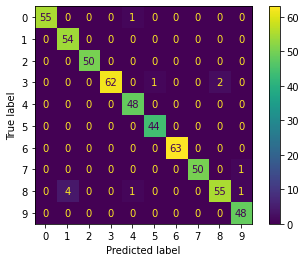

In [16]:
rf_predictions = _rf.predict(x_test)
cm2 = confusion_matrix(y_test, rf_predictions, labels=_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=_rf.classes_)
disp.plot()
plt.show()